In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Standard Units ##

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
def standart_units(x):
    """Convert the array x to standart units"""
    return (x - np.mean(x)) / np.std(x)

In [3]:
pol = Table.read_table('pollutions.csv')

In [4]:
pol.labels

('Zn', 'Fe', 'Ni', 'Cr', 'Hg', 'Analyze')

In [5]:
ni = pol.column('Ni')

In [6]:
ni_in_standart_units = standart_units(ni)

In [7]:
np.average(ni_in_standart_units), np.std(ni_in_standart_units)

(-7.868020072300939e-17, 1.0)

In [8]:
both = Table().with_columns(
    "Ni in mg/m3", ni,
    "Ni in Standart Units", ni_in_standart_units
)

In [9]:
both

Ni in mg/m3,Ni in Standart Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [10]:
np.mean(ni), np.std(ni)

(27.228279386712096, 5.8153604041908968)

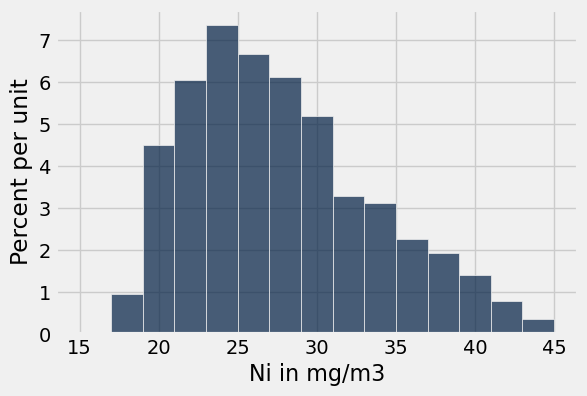

In [11]:
both.hist(0, bins = np.arange(15, 46, 2))

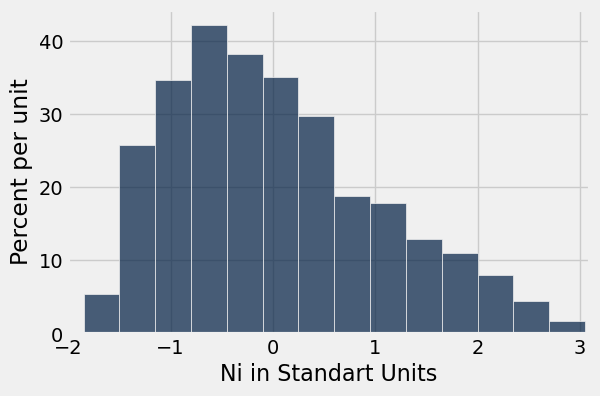

In [12]:
both.hist(1, bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

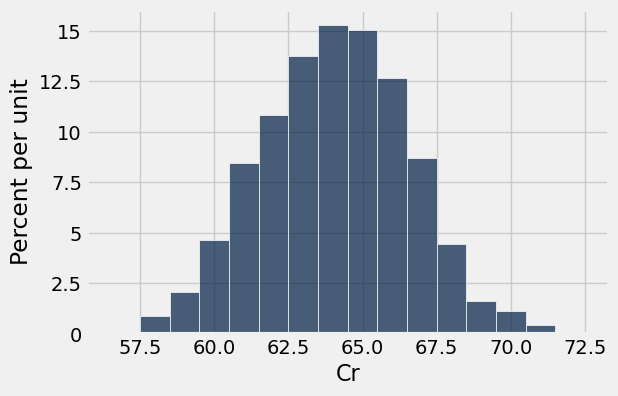

In [13]:
pol.hist('Cr', bins = np.arange(56.5, 72.6, 1), ec = 'w')

In [14]:
cr = pol.column('Cr')
np.average(cr), np.std(cr)

(64.049403747870528, 2.5250254409674375)

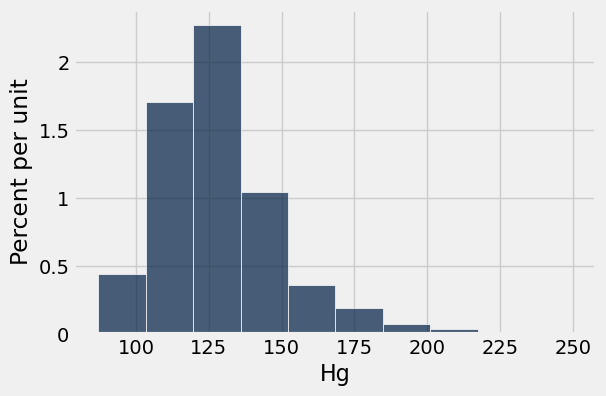

In [15]:
pol.hist('Hg', ec = 'w')

In [16]:
hg = pol.column('Hg')
np.average(hg), np.std(hg)

(128.4787052810903, 20.725449704280411)

## Central Limit Theorem ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [17]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


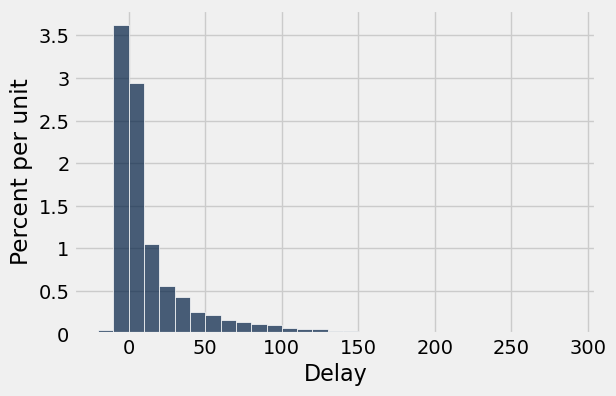

In [18]:
united.hist('Delay', bins = np.arange(-20, 300, 10), ec='w')

In [31]:
sample_size = 500

averages = make_array()

for i in np.arange(100000):
    sampled_flights = united.sample(sample_size)
    sample_average = np.average(sampled_flights.column('Delay'))
    averages = np.append(averages, sample_average)

Text(0.5, 0, 'Random Sample Average')

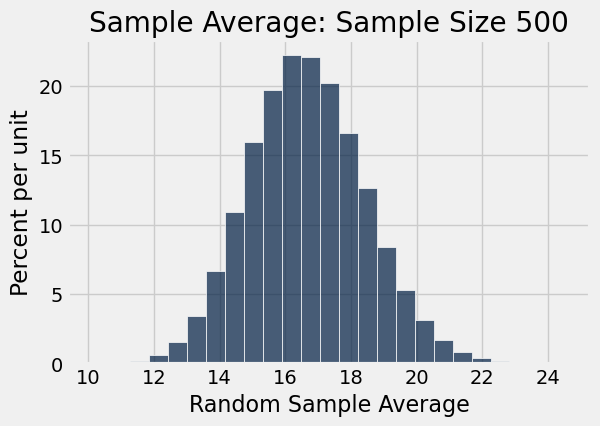

In [32]:
Table().with_column('Sample Average', averages).hist(bins = 25, ec='w')
plots.title('Sample Average: Sample Size ' + str(sample_size))
plots.xlabel('Random Sample Average')

In [33]:
pop_av = np.mean(united.column('Delay'))
pop_av

16.658155515370705